In [50]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [51]:
main_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 354

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{main_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 354 total reviews
Scraping page 2
   ---> 708 total reviews
Scraping page 3
   ---> 1062 total reviews
Scraping page 4
   ---> 1416 total reviews
Scraping page 5
   ---> 1770 total reviews
Scraping page 6
   ---> 2124 total reviews
Scraping page 7
   ---> 2478 total reviews
Scraping page 8
   ---> 2832 total reviews
Scraping page 9
   ---> 3186 total reviews
Scraping page 10
   ---> 3531 total reviews


In [52]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | They changed our Flights from ...
1,Not Verified | At Copenhagen the most chaotic...
2,✅ Trip Verified | Worst experience of my life...
3,✅ Trip Verified | Due to code sharing with Ca...
4,✅ Trip Verified | LHR check in was quick at t...


In [53]:
df

,reviews
0,Not Verified | They changed our Flights from ...
1,Not Verified | At Copenhagen the most chaotic...
2,✅ Trip Verified | Worst experience of my life...
3,✅ Trip Verified | Due to code sharing with Ca...
4,✅ Trip Verified | LHR check in was quick at t...
...,...
3526,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3527,LHR to HAM. Purser addresses all club passenge...
3528,My son who had worked for British Airways urge...
3529,London City-New York JFK via Shannon on A318 b...


In [54]:
df['reviews'] = df['reviews'].apply(lambda x: x.split("|")[1] if "|" in x else x)

In [55]:
df

,reviews
0,They changed our Flights from Brussels to Lo...
1,At Copenhagen the most chaotic ticket counte...
2,Worst experience of my life trying to deal w...
3,Due to code sharing with Cathay Pacific I wa...
4,LHR check in was quick at the First Wing and...
...,...
3526,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3527,LHR to HAM. Purser addresses all club passenge...
3528,My son who had worked for British Airways urge...
3529,London City-New York JFK via Shannon on A318 b...


In [65]:
#Cleaning the Data, Lexicon Approach 
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...


In [69]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 267.9/267.9 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [70]:
import nltk


nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooja1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooja1\AppData\Roaming\nltk_data...


In [74]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pooja1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pooja1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


KeyboardInterrupt: 

,reviews,Cleaned Reviews,POS tagged
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L..."
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (..."
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi..."
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n..."
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),..."
...,...,...,...
3526,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,LHR HKG on Boeing Much has been written about ...,"[(LHR, n), (HKG, n), (Boeing, n), (Much, n), (..."
3527,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ..."
3528,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways..."
3529,London City-New York JFK via Shannon on A318 b...,London City New York JFK via Shannon on A but ...,"[(London, n), (City, n), (New, n), (York, n), ..."


In [75]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...


In [76]:
df[['reviews','Lemma']]

,reviews,Lemma
0,They changed our Flights from Brussels to Lo...,change Flights Brussels London Heathrow LAX ...
1,At Copenhagen the most chaotic ticket counte...,Copenhagen chaotic ticket counter assignment...
2,Worst experience of my life trying to deal w...,Worst experience life try deal customer serv...
3,Due to code sharing with Cathay Pacific I wa...,Due code share Cathay Pacific downgrade BA r...
4,LHR check in was quick at the First Wing and...,LHR check quick First Wing quickly security ...
...,...,...
3526,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,LHR HKG Boeing Much write tired old fleet go...
3527,LHR to HAM. Purser addresses all club passenge...,LHR HAM Purser address club passenger name b...
3528,My son who had worked for British Airways urge...,son work British Airways urge fly British Ai...
3529,London City-New York JFK via Shannon on A318 b...,London City New York JFK via Shannon really ...


In [77]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [78]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...,-0.7980,Negative
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...,-0.0516,Negative
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...,-0.9324,Negative
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...,-0.5369,Negative
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...,0.9454,Positive


In [79]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2090
Negative    1072
Neutral      369
Name: Analysis, dtype: int64

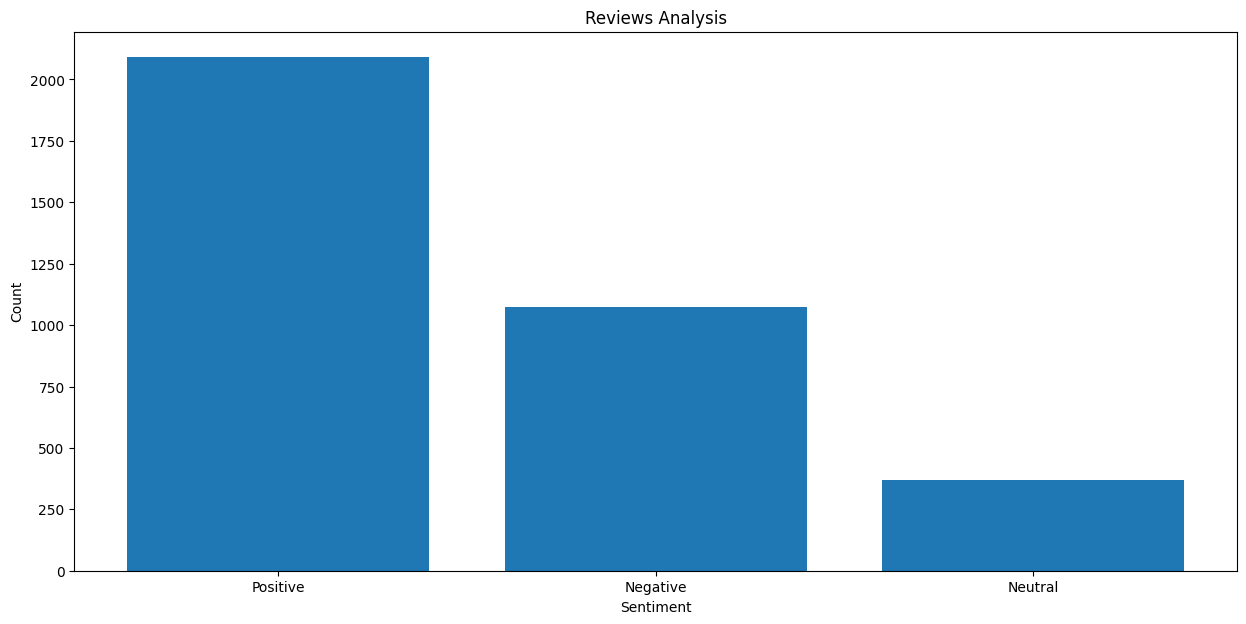

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

#plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.bar(vader_counts.index, vader_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [94]:
df.to_csv("BA_reviews.csv")

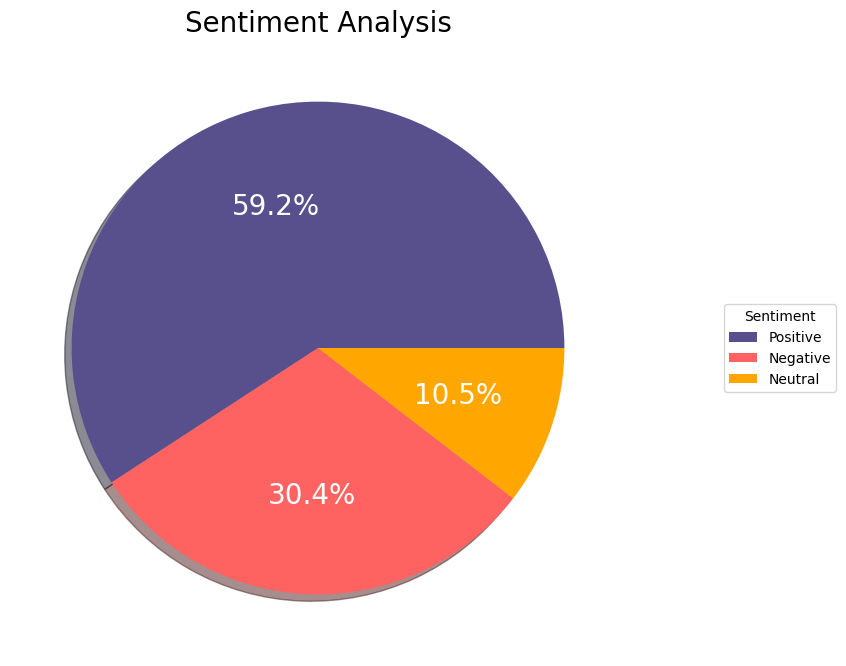

In [129]:
colors = ['#58508d', '#ff6361', '#ffa600']

# Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(vader_counts.values(), labels = vader_counts.keys(), colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=0, textprops = {'fontsize': 20, 'color': 'white'})

# font_size = 20


# # Set the font size and color for the labels
# for label in plt.gca().get_xticklabels()+plt.gca().get_yticklabels():
#     label.set_fontsize(font_size)
#     label.set_color('white')
    
    
# Add a title
plt.title('Sentiment Analysis', fontsize = 20, loc = 'center')

#textprops = {'fontsize': 14}

# Add a legend
plt.legend(title='Sentiment', loc ='center', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.show()

In [112]:
pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 1.8 MB/s eta 0:00:00


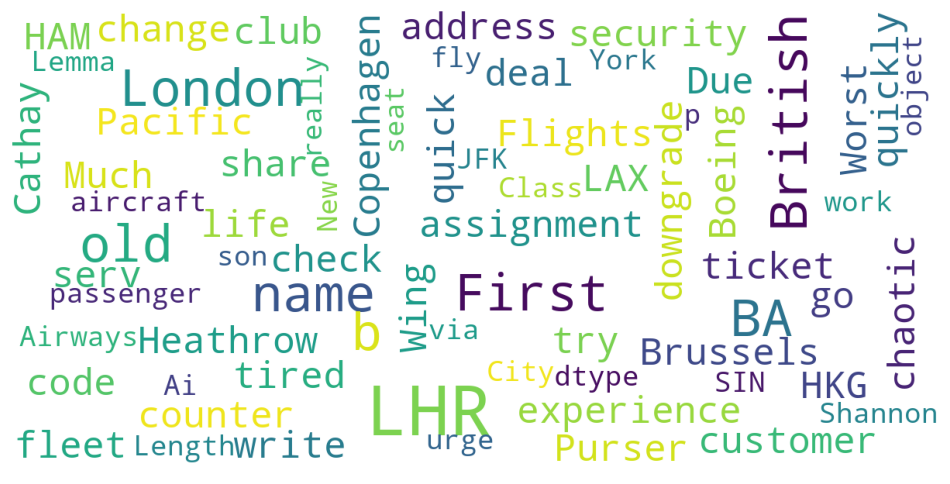

In [113]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)